# Desafio Cientista de Dados - Lighthouse Indicium 2025-11
--------------------------------------------------
*Desenvolvido por Brenda S. Machado entre 27/08/25-03/09/25.*

## Descrição do Desafio
Realizar uma análise em torno de um banco de dados cinematográfico para orientar na escolha de futuros filmes a desenvolver.

### Importante
+ Análise detalhada;
+ Máximo de fatores devem ser considerados;
+ É permitido introdução de dados externos.

### Habilidades avaliadas
+ Resolução de problemas;
+ Análise de dados;
+ Aplicação de modelos ML.

In [91]:
""" Imports """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pickle


Passo 1 - Análise exploratória dos dados
 - Resumo estatístico das colunas mais relevantes;
 - Verificar relações entre variáveis;
 - Características principais;
 - Levantar hipóteses.

In [92]:
""" Upload do Dataset """

dataset = pd.read_csv("https://drive.google.com/uc?id=1foO9ynwDaPA1Cy6qKU5vzbEl-8S-BQL5")

In [93]:
""" Análise Estatísticas dos dados"""

print(dataset.describe())

numeric_columns = dataset.select_dtypes(include=[np.number]).columns

       Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06


# 1.1 Comparação entre Gênero, Nota do IMdb e Faturamento

Objetivo:
+ Analisar qual o impacto da escolha do gênero na nota e no faturamento.

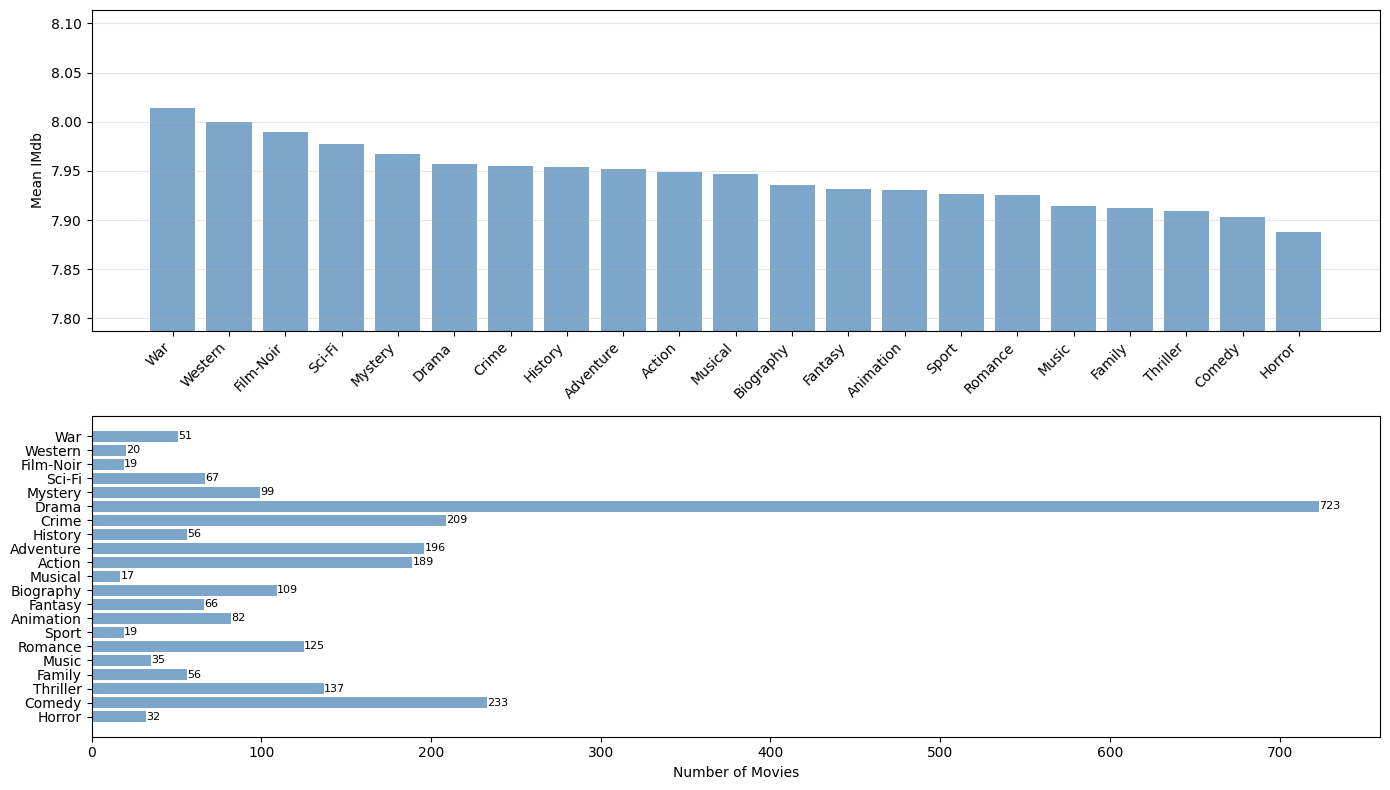

In [94]:
""" Gênero do filme x Nota do IMdb """

genre_ratings = {}

for index, row in dataset.iterrows():

  if pd.notna(row["Genre"]) and pd.notna(row["IMDB_Rating"]):
    genres = [g.strip() for g in str(row["Genre"]).split(",")]

    for genre in genres:

      if genre not in genre_ratings:
        genre_ratings[genre] = []

      genre_ratings[genre].append(row["IMDB_Rating"])

genre_statistics = {}

for genre, ratings in genre_ratings.items():

  genre_statistics[genre] = {"mean": np.mean(ratings),"count": len(ratings)}

sorted_genres = sorted(genre_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)

genres_names = [item[0] for item in sorted_genres]
genres_ratings = [item[1]["mean"] for item in sorted_genres]
genres_count = [item[1]["count"] for item in sorted_genres]
genres_worst_mean = min([item[1]["mean"] for item in sorted_genres])
genres_better_mean = max([item[1]["mean"] for item in sorted_genres])

""" Gráfico de Barras - Gênero x Nota Média """

plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.bar(range(len(genres_names)), genres_ratings, alpha=0.7, color="steelblue")
plt.xticks(range(len(genres_names)), genres_names, rotation=45, ha="right")
plt.ylabel("Mean IMdb")
plt.ylim(genres_worst_mean - 0.1, genres_better_mean + 0.1)
plt.grid(axis="y", alpha=0.3)

""" Gráfico de Barras - Número de Filmes por Gênero """

plt.subplot(2, 1, 2)
plt.barh(range(len(genres_names)), genres_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(genres_names)), genres_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(genres_count)):
    plt.text(genres_count[i] + 0.1, i, str(genres_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para analisar a nota média do IMdb dos gêneros dos filmes, de forma a analisar quais gêneros em geral têm notas mais altas.

Conclusões desse gráfico:
+ O gênero com melhor nota média é "War";
+ O gênero com pior nota média é "Horror";
+ As diferenças entre as médias de nota não são grandes, mas há gêneros com maior número de filmes, o que pode explicar o porquê filmes com gênero de "Drama" tiveram menores notas médias que outros.

O que pode ser relevante para a escolha do próximo filme:
+ Escolher um gênero com maior nota média pode ter mais chances de que o próximo filme tenha notas mais altas.


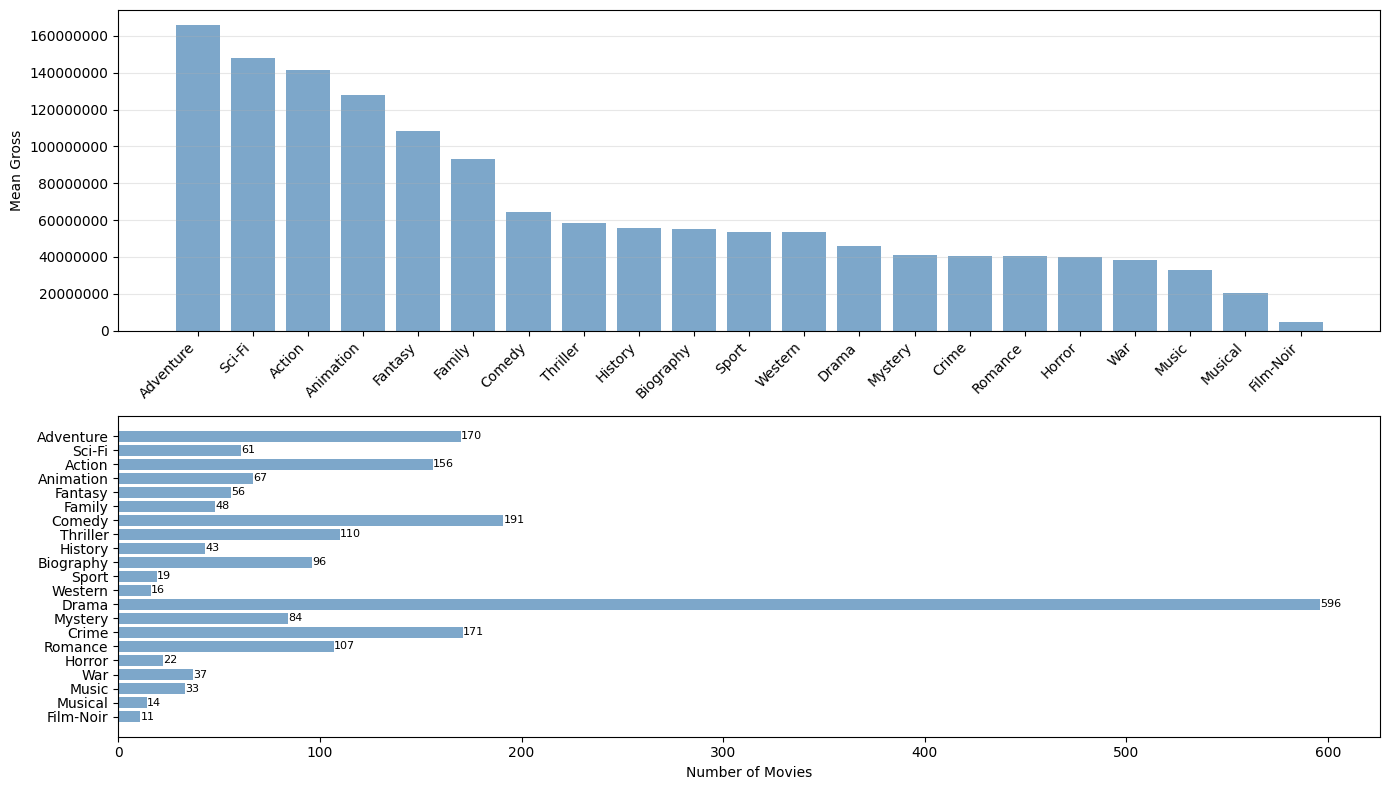

In [95]:
""" Gênero X Faturamento """

genre_gross = {}

for index, row in dataset.iterrows():

  if pd.notna(row["Genre"]) and pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
    genres = [g.strip() for g in str(row["Genre"]).split(",")]

    for genre in genres:

      if genre not in genre_gross:
        genre_gross[genre] = []

      genre_gross[genre].append(float(row["Gross"].replace(',', '')))


genre_statistics = {}

for genre, gross in genre_gross.items():

  genre_statistics[genre] = {"mean": np.mean(gross),"count": len(gross)}

sorted_genres = sorted(genre_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)

genres_names = [item[0] for item in sorted_genres]
genres_gross = [item[1]["mean"] for item in sorted_genres]
genres_count = [item[1]["count"] for item in sorted_genres]

""" Gráfico de Barras - Gênero x Faturamento """

plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.bar(range(len(genres_names)), genres_gross, alpha=0.7, color="steelblue")
plt.xticks(range(len(genres_names)), genres_names, rotation=45, ha="right")
plt.ylabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y", alpha=0.3)

""" Gráfico de Barras - Número de Filmes por Gênero """

plt.subplot(2, 1, 2)
plt.barh(range(len(genres_names)), genres_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(genres_names)), genres_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(genres_count)):
    plt.text(genres_count[i] + 0.1, i, str(genres_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para analisar os gêneros que tiveram os melhores faturamentos

Conclusões:
+ "Adventure", "Sci-Fi" e "Action" tem bons faturamentos médios, mas "Drama" é o gênero que tem um número de filmes muito maior, o que pode explicar seu baixo faturamento médio comparado com outros com menos filmes;
+ "Film-Noir" é o gênero com pior faturamento médio.

Ressalvas:
+ Valores nulos em alguns filmes, o que pode prejudicar uma análise de dados mais precisa em relação ao critério faturamento.

O que pode ser relevante para a escolha do próximo filme:
+ Gêneros que tendem a ter melhores faturamentos e sejam consistentes, como em relação ao número de filmes, pode ser uma boa escolha para um futuro filme com bom faturamento também.

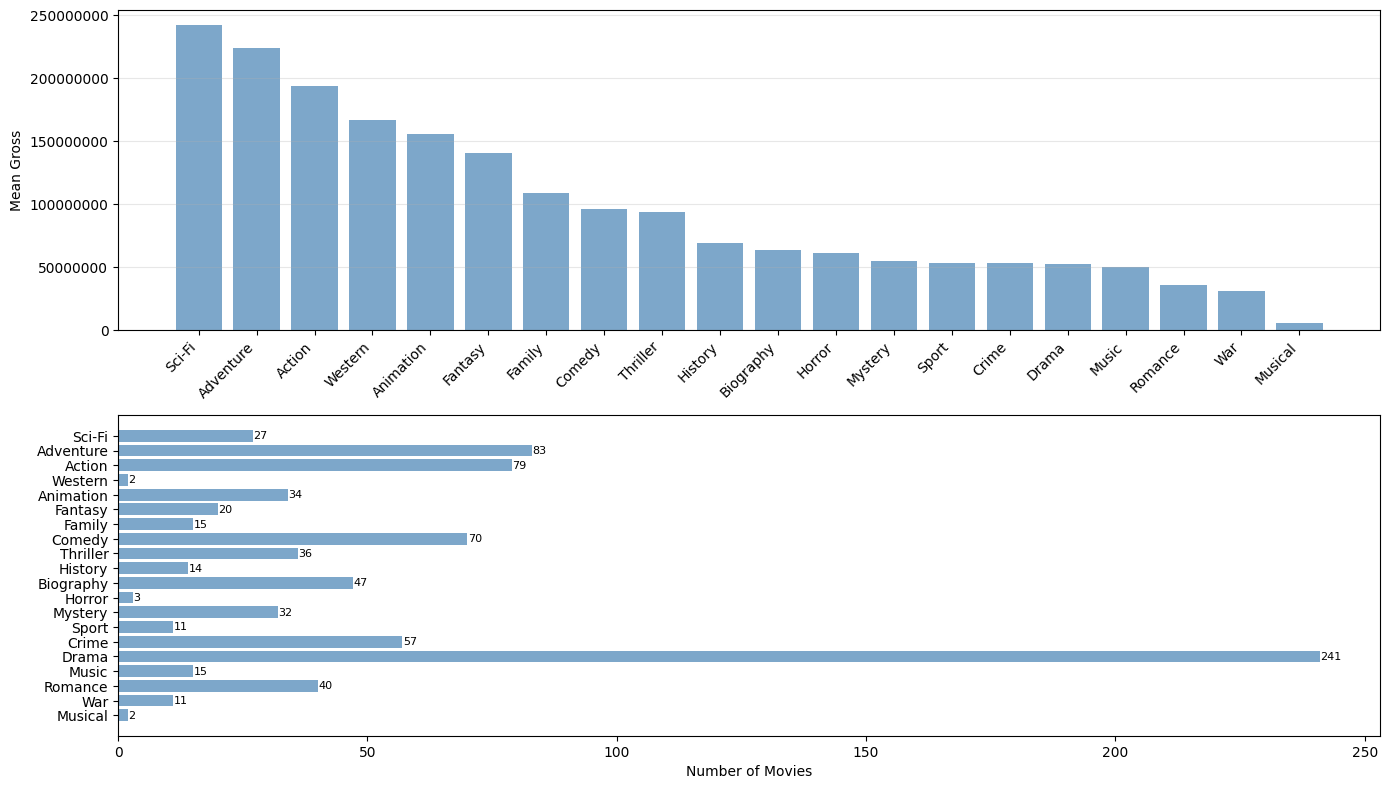

In [96]:
""" Gênero X Faturamento, em relação aos últimos vinte anos """

dataset["Released_Year"] = pd.to_numeric(dataset["Released_Year"], errors="coerce")
recent_movies_dataset = dataset[dataset["Released_Year"] >= 2005]
genre_gross = {}

for index, row in recent_movies_dataset.iterrows():

  if pd.notna(row["Genre"]) and pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
    genres = [g.strip() for g in str(row["Genre"]).split(",")]

    for genre in genres:

      if genre not in genre_gross:
        genre_gross[genre] = []

      genre_gross[genre].append(float(row["Gross"].replace(',', '')))

genre_statistics = {}

for genre, gross in genre_gross.items():

  genre_statistics[genre] = {"mean": np.mean(gross),"count": len(gross)}

sorted_genres = sorted(genre_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)

genres_names = [item[0] for item in sorted_genres]
genres_gross = [item[1]["mean"] for item in sorted_genres]
genres_count = [item[1]["count"] for item in sorted_genres]

""" Gráfico de Barras - Gênero x Faturamento """

plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.bar(range(len(genres_names)), genres_gross, alpha=0.7, color="steelblue")
plt.xticks(range(len(genres_names)), genres_names, rotation=45, ha="right")
plt.ylabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y", alpha=0.3)

""" Gráfico de Barras - Número de Filmes por Gênero """

plt.subplot(2, 1, 2)
plt.barh(range(len(genres_names)), genres_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(genres_names)), genres_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(genres_count)):
    plt.text(genres_count[i] + 0.1, i, str(genres_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()


## Gráfico para analisar os gêneros que tiveram os melhores faturamentos, em relação aos da duas últimas décadas.

Conclusões:
+ Nas duas últimas décadas, filmes "Sci-fi" tiveram maior faturamento médio que "Adventure", mas o último continua tendo um grande número de filmes, assim como "Action";
+ Alguns gêneros se tornaram mais populares e outros menos.

O que pode ser relevante para a escolha do próximo filme:
+ Gêneros que tendem a ter melhores faturamentos pode ser uma boa escolha para um futuro filme com bom faturamento também;
+ Apontar tendências e a quais gêneros o público atual pode estar mais interessado;
+ O que foi sucesso no passado, pode não ser tanto atualmente, esse gráfico ajuda a demonstrar isso.

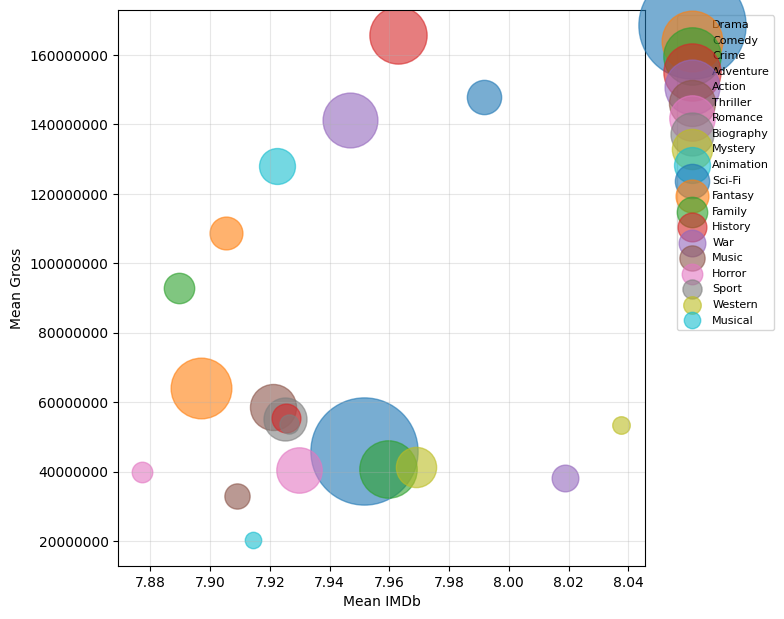

In [99]:
""" Gênero X Faturamento X Nota IMdb """

genre_data = {}

for index, row in dataset.iterrows():
  if pd.notna(row["IMDB_Rating"]) and pd.notna(row["Gross"]):
    if str(row["IMDB_Rating"]).strip() != "" and str(row["Gross"]).strip() != "":
      rating = float(str(row["IMDB_Rating"]))
      gross = float(str(row["Gross"]).replace(",", ""))

      if pd.notna(row["Genre"]) and str(row["Genre"]).strip() != "":
        genres = [g.strip() for g in str(row["Genre"]).split(",")]

        for genre in genres:

          if genre not in genre_data:
            genre_data[genre] = {"ratings": [], "gross": [], "movies": []}

          genre_data[genre]["ratings"].append(rating)
          genre_data[genre]["gross"].append(gross)
          genre_data[genre]["movies"].append(index)

genres = {}

for genre, data in genre_data.items():

  if len(data["movies"]) >= 2:
      genres[genre] = {"mean_rating": np.mean(data["ratings"]), "mean_gross": np.mean(data["gross"]), "number_movies": len(data["movies"]), "ratings": data["ratings"], "gross": data["gross"]}

top_genres = sorted(genres.items(), key=lambda x: x[1]["number_movies"], reverse=True)[:20]

""" Gráfico de Dispersão - IMdb Médio x Faturamento Médio - tamanho = número de filmes """

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)

for genre, statistics in top_genres:

  plt.scatter(statistics["mean_rating"], statistics["mean_gross"], s=statistics["number_movies"]*10, alpha=0.6, label=genre)

plt.xlabel("Mean IMDb")
plt.ylabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

plt.tight_layout()
plt.show()


# Gráfico de compação entre Gênero, nota média do IMdb e Faturamento obtidos pelos filmes

Conclusões:

+ O grande tamanho de certas bolinhas indica que um maior número de filmes pertence a certos gêneros, como "Drama", "Comedy", "Crime" e "Adventure";
+ O gênero de "Crime" tem um faturamento médio bem alto e está acima da média das notas de filme, considerando que a maior parte dos filmes está abaixo de 7.96;
+ Ter notas alta não necessariamente indica que o faturamento será alto também, como pode se ver pela variedade de notas que filmes de bons faturamentos obtiveram;
+ Pode-se notar que há mais filmes com notas menores e poucos com notas maiores, mas um ou outro variam bastante quanto ao faturamento.

O que pode ser relevante para a escolha do próximo filme:
+ Indicar um critério para levar mais conta gráficos que indiquem dados de um ou de outro;
+ Escolher entre gêneros que tenham melhores notas médias ou entre os que têm melhores faturamentos.


# Conclusões gerais da análise

Pode-se perceber que nota e faturamento são critérios bem diferentes para os filmes, logo dependendo do que a empresa estiver intessada para alcançar com um próximo filme, ou um ou outro pode ser mais relevante. Exemplos bem interessantes podem ser vistos nesses gráficos, como o caso do gênero "War", que é o que tem maiores notas médias do IMdb, mas é um dos gêneros com menor faturamento médio também. Dessa forma, apesar de nota ser um bom critério para indicar o quanto um público gostou de um filme, não necessariamente esse mesmo filme terá uma boa bilheteria. Da mesma forma que ter uma boa bilheteria não quer dizer que o filme terá uma boa nota

# 1.2 Comparação entre atores com maiores notas médias e os com melhor faturamento

Objetivo:
+ Verificar os atores que estiveram em filmes de maior faturamento;
+ Verificar os atores que estiveram em filmes de maior nota média;
+ Verificar se há alguma relação entre o ator e se aquele filme recebe média alta e faturamento alto também.

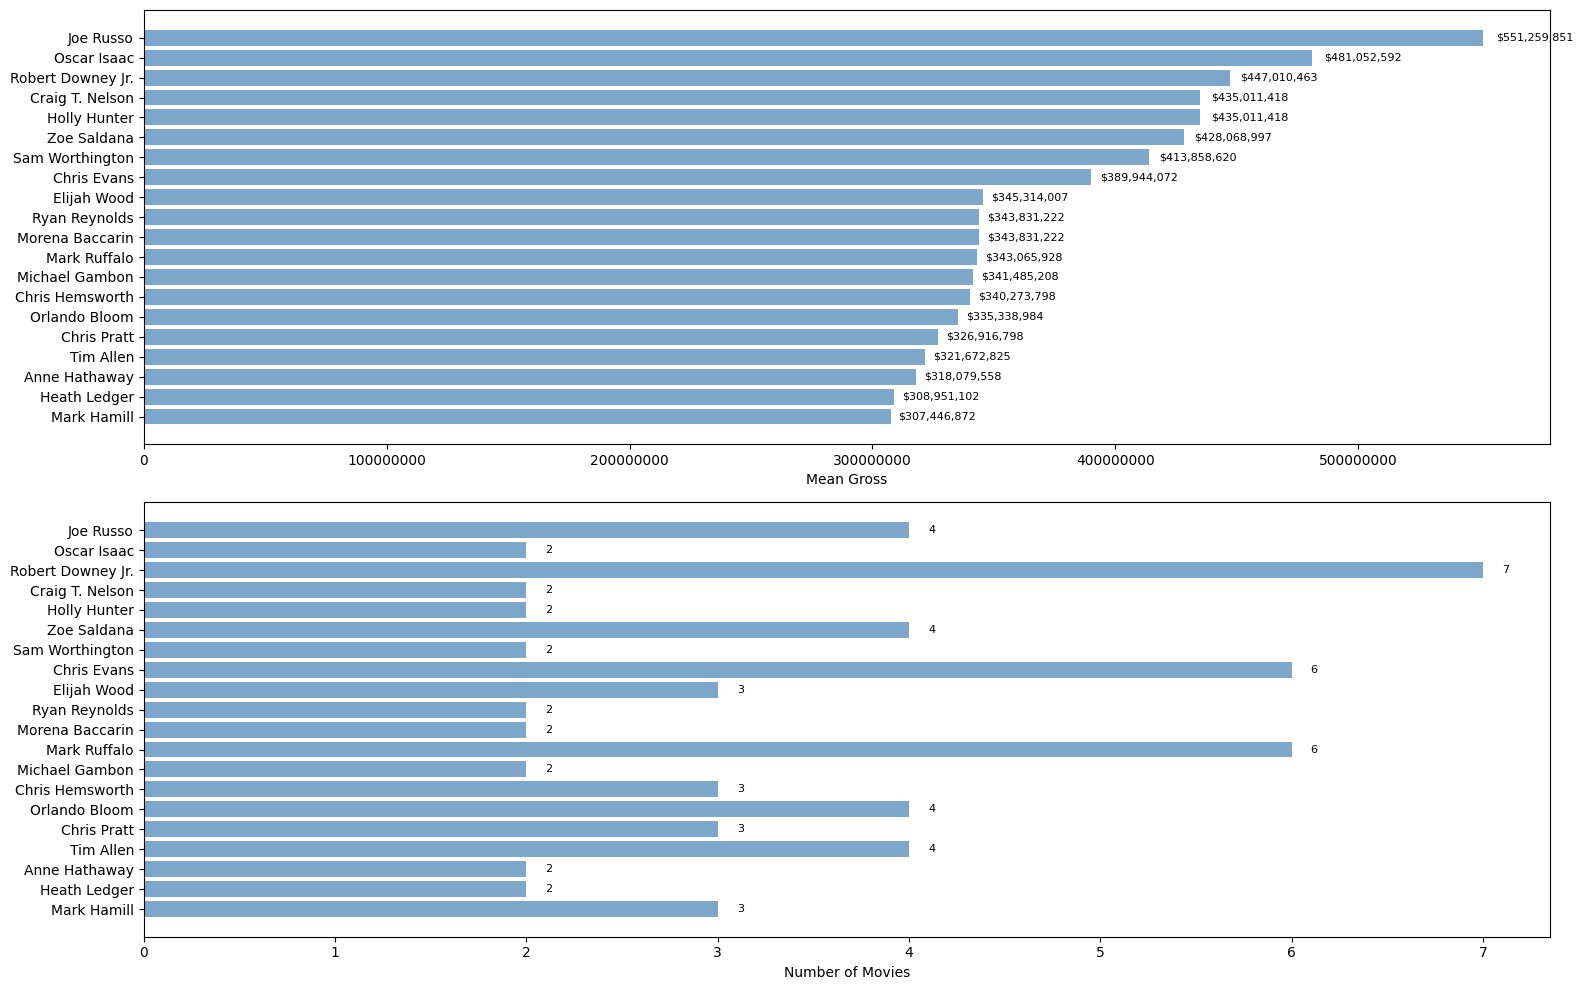

In [98]:
""" Atores X Faturamento Médio """

actor_gross = {}

for index, row in dataset.iterrows():

    if pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
      gross = float(str(row["Gross"]).replace(',', ''))

      for star_col in ["Star1", "Star2", "Star3", "Star4"]:

          if pd.notna(row[star_col]) and str(row[star_col]).strip() != '':
            actor = str(row[star_col]).strip()

            if actor not in actor_gross:
                actor_gross[actor] = []

            actor_gross[actor].append(gross)

actor_statistics = {}

for actor, gross_list in actor_gross.items():

    if len(gross_list) >= 2:
        actor_statistics[actor] = {"mean": np.mean(gross_list), "count": len(gross_list), "total": sum(gross_list)}

top_actors = sorted(actor_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)[:20]
actors_names = [item[0] for item in top_actors]
actors_mean_gross = [item[1]["mean"] for item in top_actors]
actors_count = [item[1]["count"] for item in top_actors]

""" Gráfico de Barras - Top 20 Atores por Faturamento Médio """

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
bars = plt.barh(range(len(actors_names)), actors_mean_gross, alpha=0.7, color="steelblue")
plt.yticks(range(len(actors_names)), actors_names)
plt.xlabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="x")
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):

  width = bar.get_width()
  plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", ha="left", va="center", fontsize=8)

""" Gráfico de Barras - Número de Filmes por Ator """

plt.subplot(2, 1, 2)
plt.barh(range(len(actors_names)), actors_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(actors_names)), actors_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(actors_count)):

  plt.text(actors_count[i] + 0.1, i, str(actors_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para analisar o faturamento médio dos filmes dos atores, com relação aos 20 atores com melhor faturamento médio nos filmes que estiveram

Conclusões:
+ Analisando ambos os gráficos, pode-se verificar quais atores estiveram em produções com maior faturamento;
+ Além disso, e verificando o número de filmes, pode-se ver os atores com maior consistência de faturamento nos filmes que fazem, como, por exemplo Robert Downey Jr., que fez 7 filmes e obteve a terceira maior média de faturamento.

O que pode ser relevante para a escolha do próximo filme:
+ A escolha de atores com consistência de faturamento pode ser interessante para garantir que o próximo filme tenha mais chances de obter um alto faturamento também.

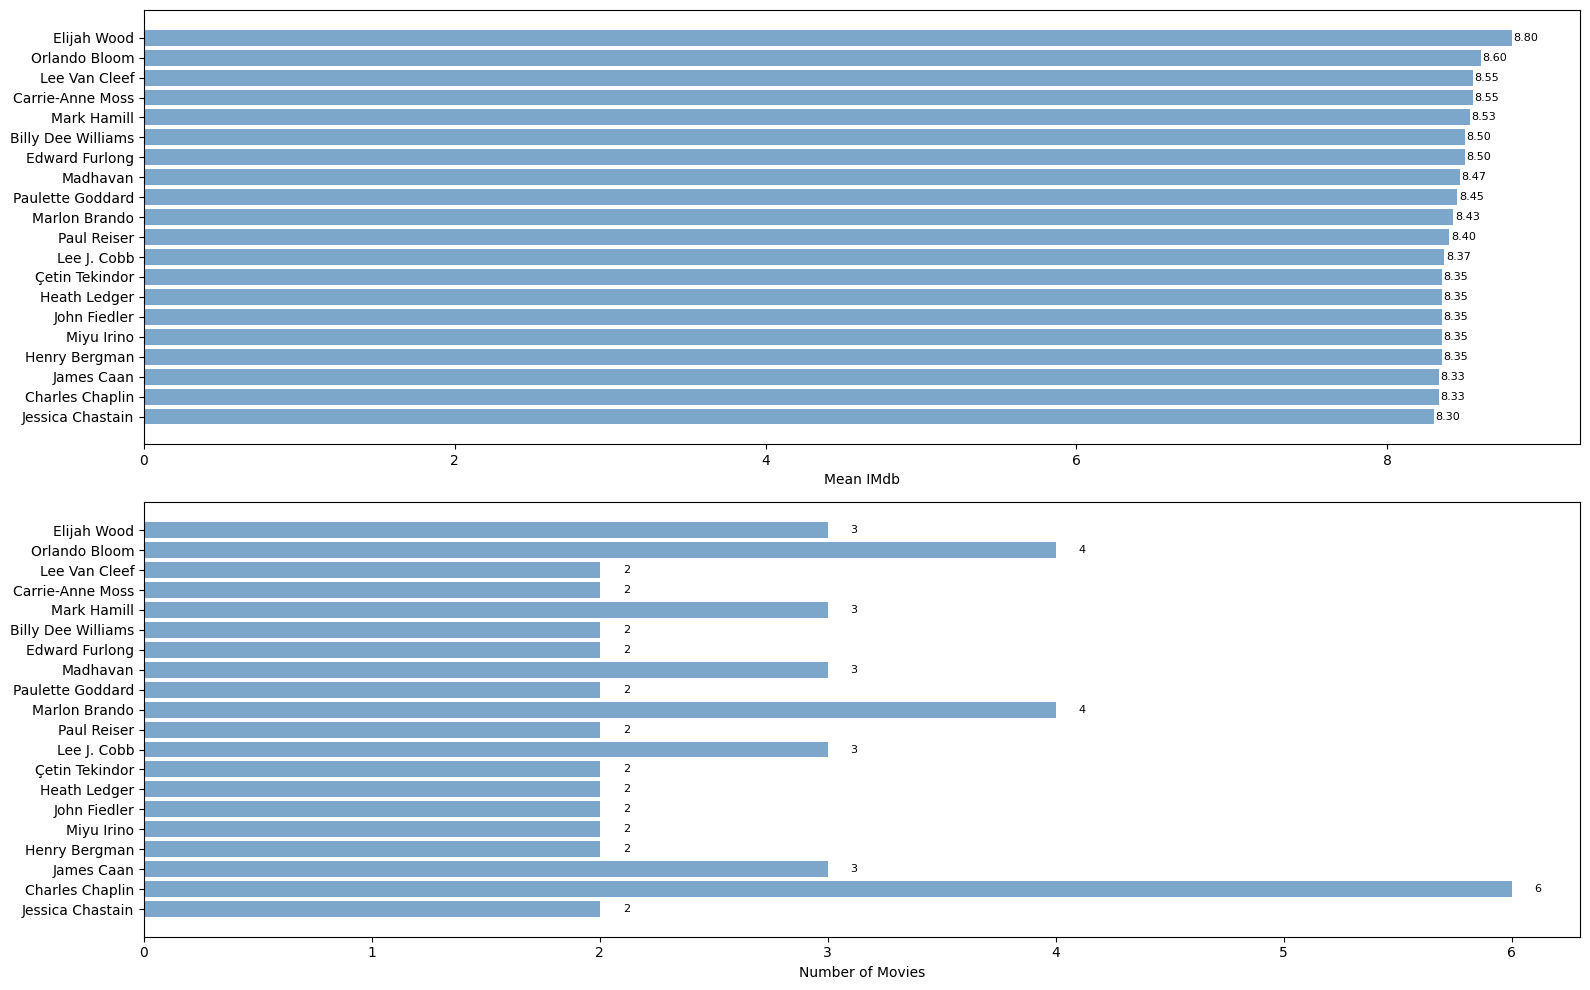

In [80]:
""" Atores X Nota IMdb Média """

actor_rating = {}

for index, row in dataset.iterrows():

  if pd.notna(row["IMDB_Rating"]) and str(row["IMDB_Rating"]).strip() != '':
    rating = float(str(row["IMDB_Rating"]))

    for star_col in ["Star1", "Star2", "Star3", "Star4"]:

      if pd.notna(row[star_col]) and str(row[star_col]).strip() != '':
        actor = str(row[star_col]).strip()

        if actor not in actor_rating:
          actor_rating[actor] = []

        actor_rating[actor].append(rating)

actor_statistics = {}

for actor, rating_list in actor_rating.items():

  if len(rating_list) >= 2:
    actor_statistics[actor] = {"mean": np.mean(rating_list), "count": len(rating_list), "total": sum(rating_list)}

top_actors = sorted(actor_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)[:20]
actors_names = [item[0] for item in top_actors]
actors_mean_rating = [item[1]["mean"] for item in top_actors]
actors_count = [item[1]["count"] for item in top_actors]

""" Gráfico de Barras - Top 20 Atores por Nota IMdb Média """

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
bars = plt.barh(range(len(actors_names)), actors_mean_rating, alpha=0.7, color="steelblue")
plt.yticks(range(len(actors_names)), actors_names)
plt.xlabel("Mean IMdb")
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):

  width = bar.get_width()
  plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha="left", va="center", fontsize=8)

""" Gráfico de Barras - Número de Filmes por Ator """

plt.subplot(2, 1, 2)
plt.barh(range(len(actors_names)), actors_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(actors_names)), actors_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(actors_count)):

  plt.text(actors_count[i] + 0.1, i, str(actors_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para analisar a nota IMdb média dos filmes dos atores, com relação aos 20 atores com melhor nota média em relação aos filmes que estiveram

Conclusões:
+ Analisando ambos os gráficos, pode-se verificar quais atores estiveram em produções com maior nota média;
+ Além disso, e verificando o número de filmes, pode-se ver os atores com maior consistência de notas nos filmes em que estiveram, como o Charles Chaplin;
+ As médias são bem semelhantes, mas pode-se separar aqueles com maior número de filmes.

O que pode ser relevante para a escolha do próximo filme:
+ A escolha de atores com consistência de notas médias no IMdb pode ser interessante para garantir que o próximo filme tenha mais chances de obter nota alta também.

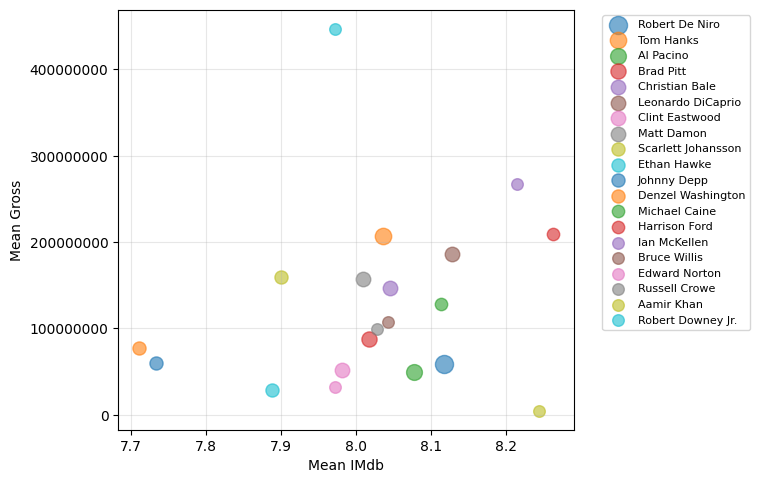

In [81]:
""" Ator X Nota IMdb X Faturamento """

actor_data = {}

for index, row in dataset.iterrows():

  if pd.notna(row["IMDB_Rating"]) and pd.notna(row["Gross"]):

    if str(row["IMDB_Rating"]).strip() != '' and str(row["Gross"]).strip() != '':
      rating = float(str(row["IMDB_Rating"]))
      gross = float(str(row["Gross"]).replace(',', ''))

      for star_col in ["Star1", "Star2", "Star3", "Star4"]:

        if pd.notna(row[star_col]) and str(row[star_col]).strip() != '':
          actor = str(row[star_col]).strip()

          if actor not in actor_data:
            actor_data[actor] = {"ratings": [], "gross": [], "movies": []}

          actor_data[actor]["ratings"].append(rating)
          actor_data[actor]["gross"].append(gross)
          actor_data[actor]["movies"].append(index)

actors = {}

for actor, data in actor_data.items():

  if len(data['movies']) >= 2:
    actors[actor] = {"mean_rating": np.mean(data["ratings"]), "mean_gross": np.mean(data["gross"]), "number_movies": len(data["movies"]), "ratings": data["ratings"], "gross": data["gross"]}

top_actors = sorted(actors.items(), key=lambda x: x[1]["number_movies"], reverse=True)[:20]

""" Gráfico de Dispersão - IMdb Médio x Faturamento Médio - tamanho = número de filmes """

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)

for actor, statistics in top_actors:

  plt.scatter(statistics["mean_rating"], statistics["mean_gross"], s=statistics["number_movies"]*10, alpha=0.6, label=actor)

plt.xlabel("Mean IMdb")
plt.ylabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

## Gráfico para analisar a relação entre a nota IMdb média e o faturamento médio dos filmes em relação aos atores

Conclusões:
+ Como já visto em gráficos anteriores, não há uma relação clara entre faturamento e nota, mesmo para o caso dos atores;
+ Apesar disso e levando em conta o tamanho da bolinha (número de filmes), temos alguns atores que saem da média de faturamento e nota, como o "Tom Hanks", com nota acima de 8 e bom faturamento, mas grande número de filmes também;
+ Há atores com menor número de filmes, mas que também tem uma boa relação entre nota e faturamento, como o "Harrison Ford" e o "Ian McKellen".

O que pode ser relevante para o próximo filme:
+ Atores com uma boa relação nota IMdb e faturamento podem ser um bom indicativo para um filme com uma boa relação entre ambos também;
+ Como visto anteriormente, a escolha de atores pode influenciar na nota e no faturamento, então dependendo do objetivo da empresa, uma boa seleção de atores é crucial para o sucesso de um novo filme.

Conclusões gerais da análise

A escolha de atores pode ser muito relevante para o sucesso de faturamento ou de nota de um filme. Analisando os dados, pode se encontrar casos com atores que participaram de filmes que tiveram altos faturamentos médio, mas também atores que estiveram em vários filmes com boas notas médias no IMdb. Ainda, há a possibilidade de um equilíbrio entre os dois fatores, sendo que há casos de atores que obtiveram faturamentos e notas relevantes para os filmes em que estiveram. Dessa forma, dependendo que qual o objetivo da empresa para seu próximo filme, a escolha dos atores é crucial para o sucesso que deseja atingir.

# 1.4 Análise do impacto da escolha de um diretor na nota do IMdb e faturamentos do filme

Objetivos:
+ Analisar quais diretores tiveram melhores faturamentos médios;
+ Analisar quais diretores tiveram melhores notas do IMdb médias;
+ Verificar se há alguma relação entre nota e faturamento para os diretores.


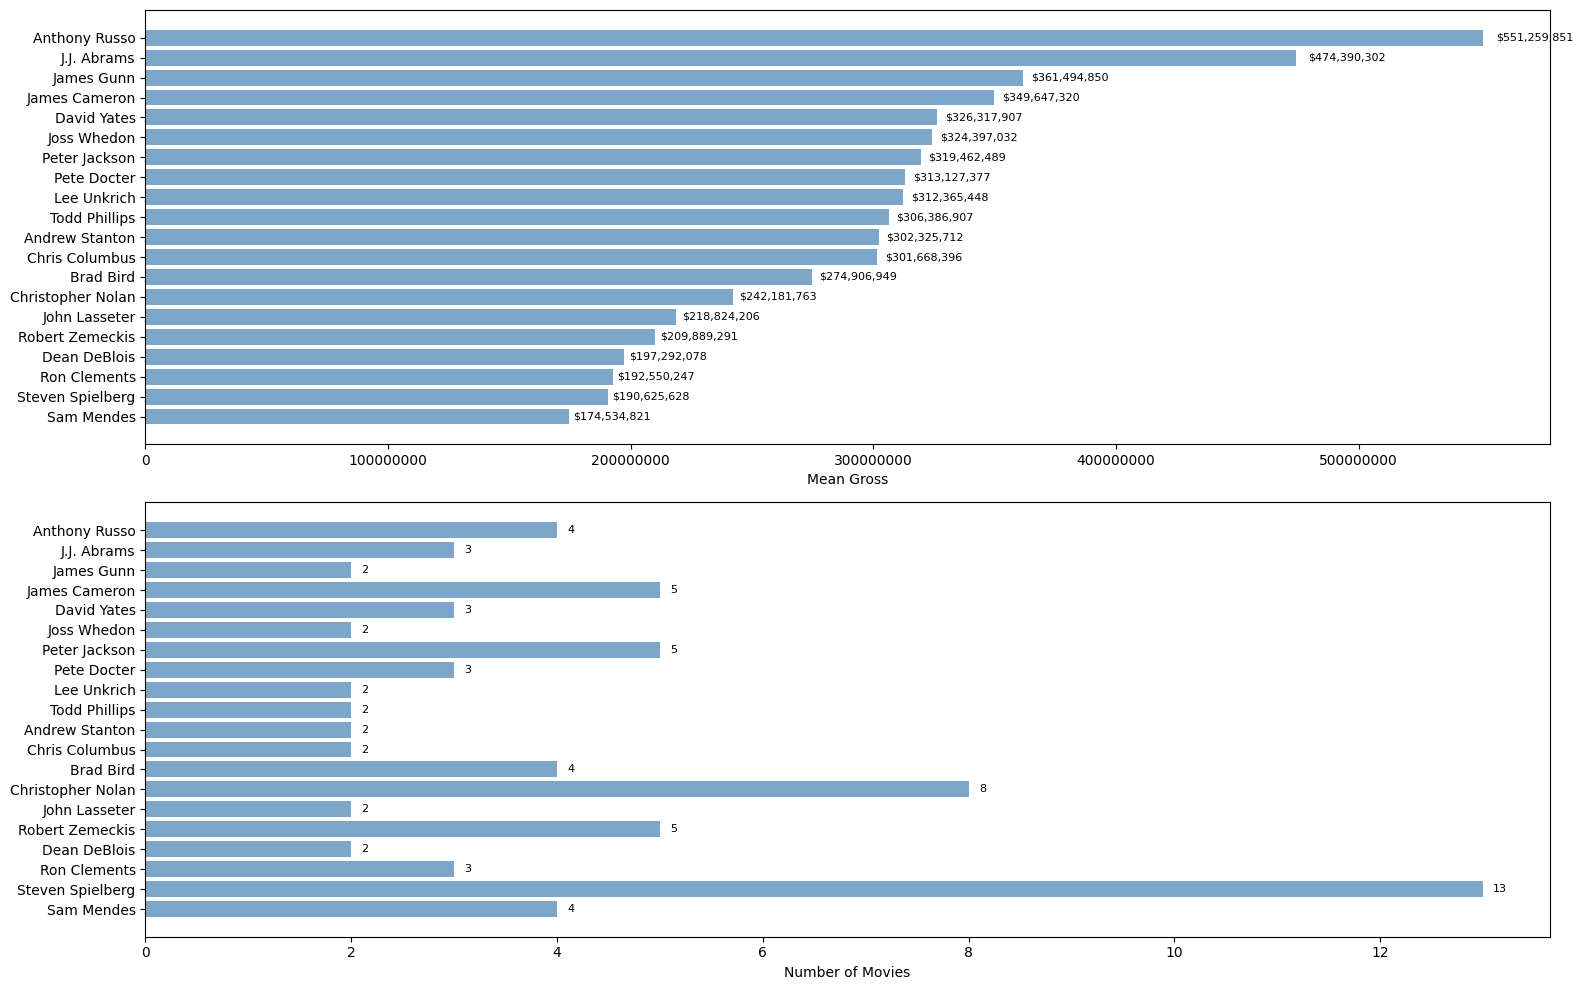

In [82]:
""" Diretor X Faturamento Médio """

director_gross = {}

for index, row in dataset.iterrows():

  if pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':

    if pd.notna(row["Director"]) and str(row["Director"]).strip() != '':
      gross = float(str(row["Gross"]).replace(',', ''))
      director = str(row["Director"]).strip()

      if director not in director_gross:
        director_gross[director] = []

      director_gross[director].append(gross)

director_statistics = {}

for director, gross_list in director_gross.items():

  if len(gross_list) >= 2:
    director_statistics[director] = {"mean": np.mean(gross_list), "count": len(gross_list), "total": sum(gross_list)}

top_directors = sorted(director_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)[:20]
directors_names = [item[0] for item in top_directors]
directors_mean_gross = [item[1]["mean"] for item in top_directors]
directors_count = [item[1]["count"] for item in top_directors]

""" Gráfico de Barras - Top 20 Diretores por Faturamento Médio """

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
bars = plt.barh(range(len(directors_names)), directors_mean_gross, alpha=0.7, color="steelblue")
plt.yticks(range(len(directors_names)), directors_names)
plt.xlabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="x")
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):

  width = bar.get_width()
  plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, f"${width:,.0f}", ha="left", va="center", fontsize=8)

""" Gráfico de Barras - Número de Filmes por Diretor """

plt.subplot(2, 1, 2)
bars2 = plt.barh(range(len(directors_names)), directors_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(directors_names)), directors_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(directors_count)):

  plt.text(directors_count[i] + 0.1, i, str(directors_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para estimar o faturamento médio obtido pelos filmes de cada diretor, com relação aos Top 20 diretores com maior faturamento médio

Conclusões:
+ Há dois diretores que lideram o ranking de maiores faturamentos de filmes, "Anthony Russo" e "J.J. Abrams";
+ Há diretores com grande número de filmes, mas que ficam na média de faturamentos, como "Steven Spielberg" e "Christopher Nolan";
+ Há diretores com número de filmes acima da média e que tem faturamentos relevantes também, como "James Cameron" e "Peter Jackson".

O que pode ser relevante para um próximo filme:
+ Diretores com um bom faturamento médio podem ser um bom indicativo para que um filme tenha um bom faturamento médio também;
+ Um diretor consistente, que tenha bons faturamentos nos filmes que dirigiu é um bom indicativo de que um próximo possa ter também.


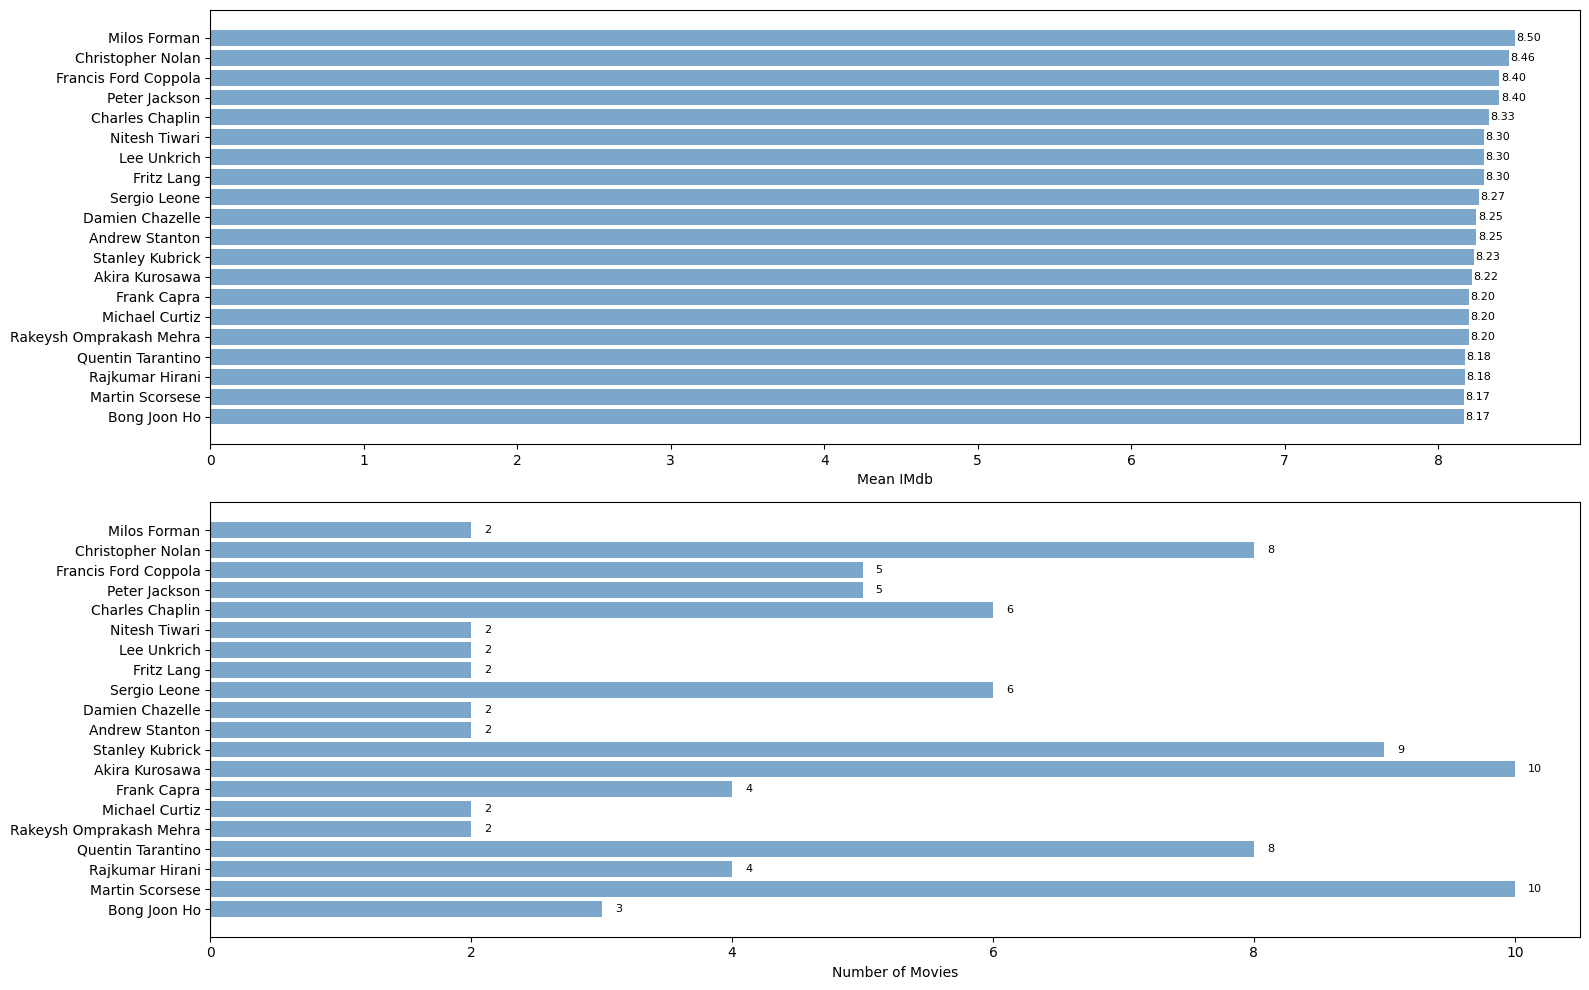

In [83]:
""" Diretor X Nota Média IMdb """

director_rating = {}

for index, row in dataset.iterrows():

  if pd.notna(row["IMDB_Rating"]) and str(row["IMDB_Rating"]).strip() != '':

    if pd.notna(row["Director"]) and str(row["Director"]).strip() != '':
      rating = float(str(row["IMDB_Rating"]))
      director = str(row["Director"]).strip()

      if director not in director_rating:
        director_rating[director] = []

      director_rating[director].append(rating)

director_statistics = {}

for director, rating_list in director_rating.items():

  if len(rating_list) >= 2:
    director_statistics[director] = {"mean": np.mean(rating_list), "count": len(rating_list), "total": sum(rating_list)}

top_directors = sorted(director_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)[:20]
directors_names = [item[0] for item in top_directors]
directors_mean_rating = [item[1]["mean"] for item in top_directors]
directors_count = [item[1]["count"] for item in top_directors]

""" Gráfico de Barras - Top 20 Diretores Média IMdb """

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
bars = plt.barh(range(len(directors_names)), directors_mean_rating, alpha=0.7, color="steelblue")
plt.yticks(range(len(directors_names)), directors_names)
plt.xlabel("Mean IMdb")
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):

  width = bar.get_width()
  plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f"{width:.2f}", ha="left", va="center", fontsize=8)

""" Gráfico de Barras - Número de Filmes """

plt.subplot(2, 1, 2)
bars2 = plt.barh(range(len(directors_names)), directors_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(directors_names)), directors_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(directors_count)):

  plt.text(directors_count[i] + 0.1, i, str(directors_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

## Gráfico para analisar a nota IMdb média dos filmes dos diretores, com relação aos 20 diretores com melhor nota média em relação aos filmes que dirigiram

Conclusões:
+ Analisando ambos os gráficos, pode-se verificar quais diretores estiveram em produções com maior nota média;
+ Além disso, e verificando o número de filmes, pode-se ver os diretores com maior consistência de notas nos filmes que dirigiram, como "Akira Kurosawa" e "Martin Scorcese";
+ As médias são bem semelhantes, mas pode-se separar aqueles com maior número de filmes, os quais têm uma consistência melhor nas médias de notas que obtiveram.

O que pode ser relevante para a escolha do próximo filme:
+ Escolher diretores com consistência de notas médias pelos filmes que fizeram pode ser relevante para obter filmes com boas notas médias também.

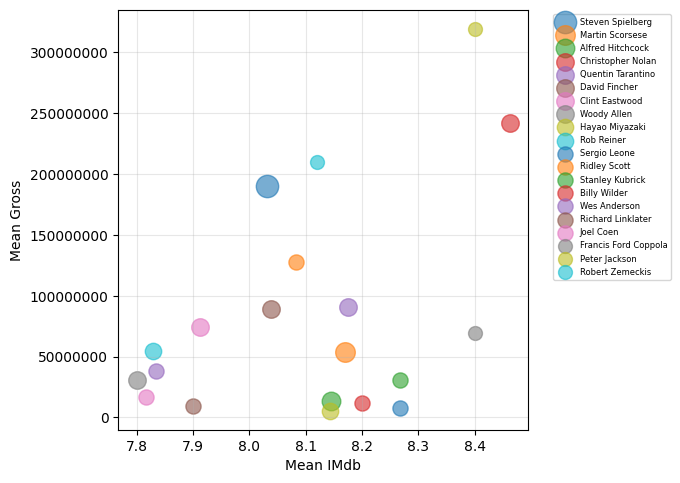

In [84]:
""" Diretor X Nota IMdb X Faturamento """

director_data = {}

for index, row in dataset.iterrows():

  if pd.notna(row["IMDB_Rating"]) and pd.notna(row["Gross"]):

    if str(row["IMDB_Rating"]).strip() != '' and str(row["Gross"]).strip() != "":

      if pd.notna(row["Director"]) and str(row["Director"]).strip() != "":
        rating = float(str(row["IMDB_Rating"]))
        gross = float(str(row["Gross"]).replace(",", ""))
        director = str(row["Director"]).strip()

        if director not in director_data:
          director_data[director] = {"ratings": [], "gross": [], "movies": []}

        director_data[director]["ratings"].append(rating)
        director_data[director]["gross"].append(gross)
        director_data[director]["movies"].append(index)

directors = {}

for director, data in director_data.items():

  if len(data['movies']) >= 2:
    directors[director] = {"mean_rating": np.mean(data["ratings"]), "mean_gross": np.mean(data["gross"]), "number_movies": len(data["movies"]), "ratings": data["ratings"], "gross": data["gross"]}

top_directors = sorted(directors.items(), key=lambda x: x[1]["number_movies"], reverse=True)[:20]

""" Gráfico de Dispersão - IMdb Médio x Faturamento Médio - tamanho = número de filmes """

plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)

for director, stats in top_directors:

  plt.scatter(stats["mean_rating"], stats["mean_gross"], s=stats["number_movies"]*20, alpha=0.6,label=director)

plt.xlabel("Mean IMdb")
plt.ylabel("Mean Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=6)


## Gráfico para analisar a relação entre a nota IMdb média e o faturamento médio dos filmes em relação aos diretore

Conclusões:
+ Como já visto em gráficos anteriores, não há uma relação clara entre faturamento e nota, mesmo para o caso dos diretores;
+ Apesar disso e levando em conta o tamanho da bolinha (número de filmes), temos bons exemplos de diretores que tem uma boa relação entre nota e faturamento, como "Christopher Nolan" e "Peter Jackson";
+ Há filmes com boas notas que tem baixo faturamento, mas alguns que ficam na média de notas e se destacam no faturamento, como "Steven Spielberg".

O que pode ser relevante para o próximo filme:
+ Escolher diretores com uma boa relação entre nota e faturamento pode ser um bom fator para que o próximo filme também tenha uma boa relação entre esses dois fatores.

Conclusões gerais da análise:

Pode-se concluir que diretor é uma variável relevante na escolha de um filme e pode impactar no seu sucesso, tanto de nota do IMdb quanto de faturamento. Dessa forma, a escolha de um diretor é crucial para que o filme faça sucesso, de acordo com os objetivos da empresa. Além disso, há certa consistência de alguns diretores entre obter uma boa nota e ter um bom faturamento, o que é relevante se a empresa tiver o objetivo de equilibrar ambos os fatores.

# 1.4 Análise de outras variáveis que impactam no faturamento

Objetivo:
+ Verificar quais outras variáveis impactam de forma marcante no faturamento de um filme.

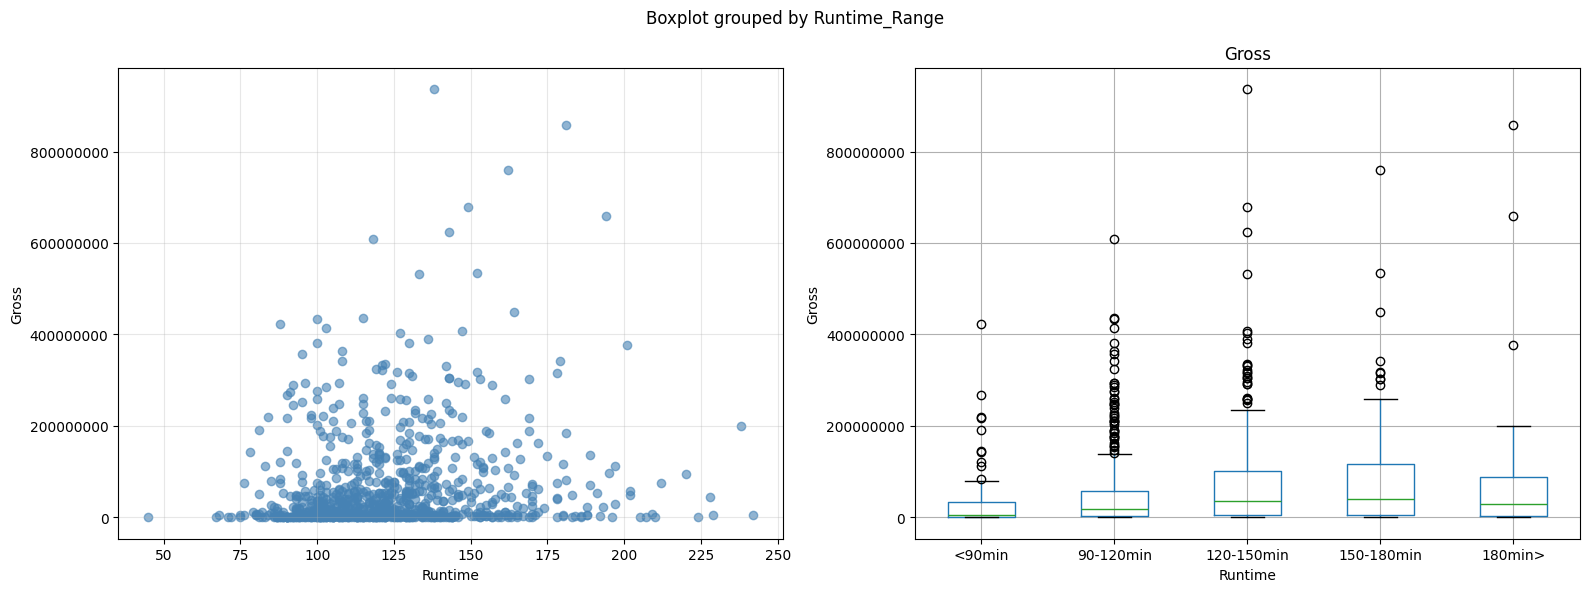

In [85]:
""" Duração X Faturamento """

runtimes = []
gross_values = []

for index, row in dataset.iterrows():

  if pd.notna(row["Runtime"]) and pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
    runtime_value = float(str(row["Runtime"]).replace("min", "").strip())
    gross = float(str(row["Gross"]).replace(",", ""))
    runtimes.append(runtime_value)
    gross_values.append(gross)

""" Gráfico de Dispersão - Média de duração x Faturamento """

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(runtimes, gross_values, alpha=0.6, color="steelblue")
plt.xlabel("Runtime")
plt.ylabel("Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)

""" Boxplot - Média de duração x Faturamento """

plt.subplot(1,2,2)
runtime_columns = pd.cut(runtimes, bins=[0, 90, 120, 150, 180, 300], labels=["<90min", "90-120min", "120-150min", "150-180min", "180min>"])
runtime_gross_dataset = pd.DataFrame({"Runtime_Range": runtime_columns, "Gross": gross_values})
runtime_gross_dataset.boxplot(column="Gross", by="Runtime_Range", ax=plt.gca())
plt.ylabel("Gross")
plt.xlabel("Runtime")
plt.ticklabel_format(style="plain", axis="y")

plt.tight_layout()
plt.show()

## Gráfico para comparar a duração com o faturamento obtidos por um filme.

Conclusões:
+ A maioria dos filmes se concentra numa faixa entre 100 a 150 minutos;
+ Não há uma relação muito clara entre faturamento e duração.

O que pode ser relevante para a escolha do próximo filme:
+ Filmes mais longos em geral custam mais, mas como se pode ver nos gráficos, não necessariamente têm um retorno melhor, analisando os filmes >180 minutos;
+ Da mesma forma, filmes mais curtos, que em geral podem ser mais baratos de produzir, tiveram menores faturamentos.

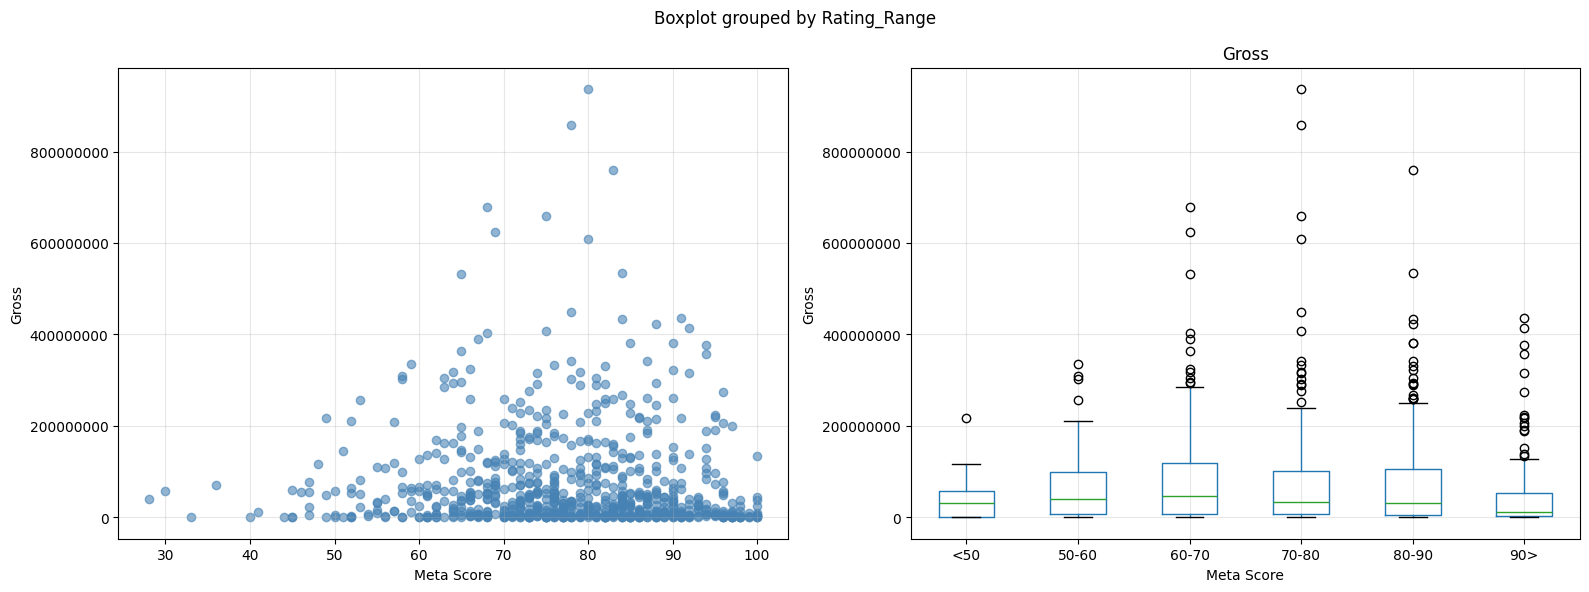

In [86]:
""" Meta Score X Faturamento """

ratings = []
gross_values = []

for index, row in dataset.iterrows():

  if pd.notna(row["Meta_score"]) and pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
    rating = float(row["Meta_score"])
    gross = float(str(row["Gross"]).replace(',', ''))
    ratings.append(rating)
    gross_values.append(gross)

""" Gráfico de Dispersão - Meta Score x Faturamento """

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(ratings, gross_values, alpha=0.6, color="steelblue")
plt.xlabel("Meta Score")
plt.ylabel("Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)

""" Boxplot - Meta Score x Faturamento """

plt.subplot(1,2,2)
rating_columns = pd.cut(ratings, bins=[0, 50, 60, 70, 80, 90, 100], labels=["<50","50-60","60-70", "70-80", "80-90", "90>"])
rating_gross_dataset = pd.DataFrame({"Rating_Range": rating_columns, "Gross": gross_values})
rating_gross_dataset.boxplot(column="Gross", by="Rating_Range", ax=plt.gca())
plt.xlabel("Meta Score")
plt.ylabel("Gross")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Gráfico para comparar a Meta Score com o faturamento obtidos por um filme.

Conclusões:
+ Não há uma relação muito clara entre Meta Score e faturamento, sendo que há filmes com ótimas notas e faturamentos ruins;
+ Pode-se notar que há menos filmes com Scores menores do que 60, a maioria está entre 70-90;
+ Não necessariamente um filme com alto Score terá mais faturamento, assim como não necessariamente um filme com alto faturamento tem maior Score.

O que pode ser relevante para a escolha do próximo filme:
+ Meta Score não é uma variável com grande impacto no faturamento de um filme.

# Outras comparações entre variáveis

Objetivo:
+ Verificar como outras variáveis se relacionam;
+ Comparar nota do IMdb e Meta Score, em que uma indica a nota do público para um filme e a segunda a nota da crítica especializada;
+ Comparar os gêneros com a Meta Score, para verificar quais gêneros agradam mais os críticos.

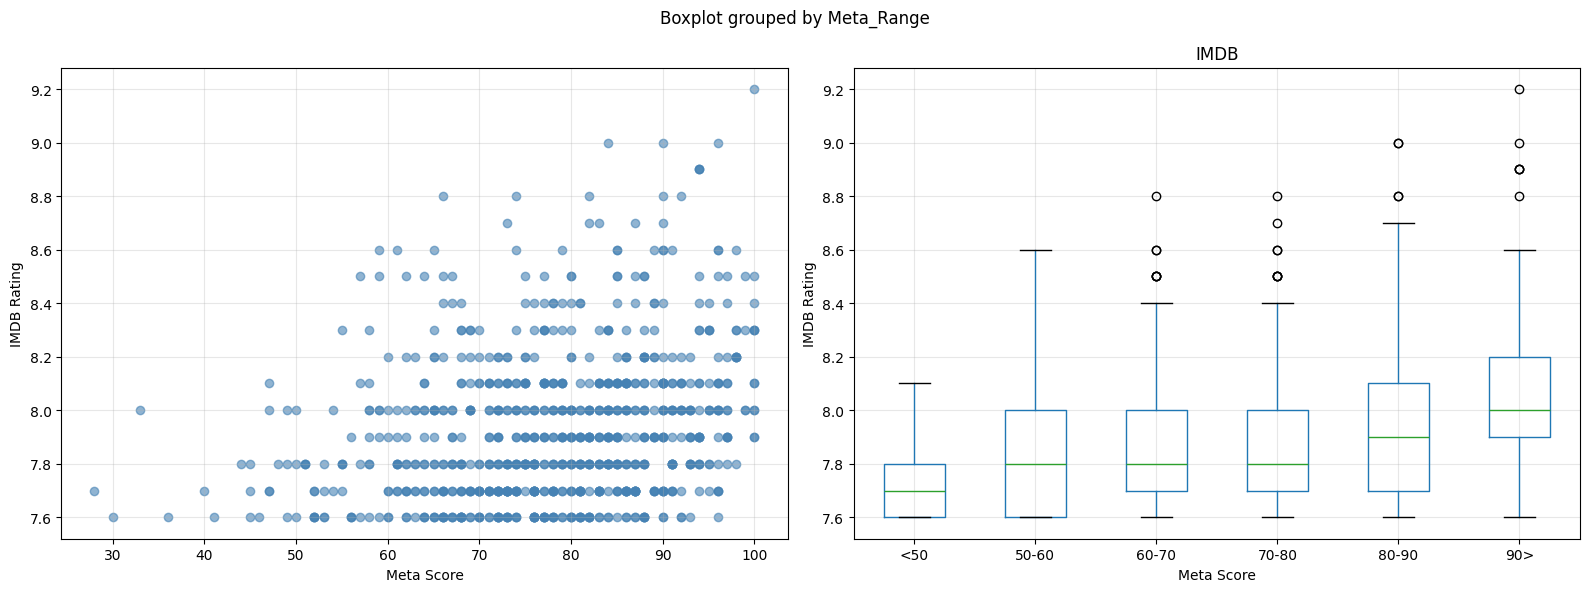

In [87]:
""" Nota IMdb X Meta Score """

ratings = []
meta_scores = []

for index, row in dataset.iterrows():

  if pd.notna(row["Meta_score"]) and pd.notna(row["IMDB_Rating"]):
    rating_imdb = float(str(row["IMDB_Rating"]))
    rating_meta = float(row["Meta_score"])
    gross = float(str(row["Gross"]).replace(',', ''))
    ratings.append(rating_imdb)
    meta_scores.append(rating_meta)

""" Gráfico de Dispersão - Nota IMdb X Meta Score """

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(meta_scores, ratings, alpha=0.6, color="steelblue")
plt.xlabel("Meta Score")
plt.ylabel("IMDB Rating")
plt.grid(True, alpha=0.3)

""" Boxplot - Nota IMdb X Meta Score """

plt.subplot(1,2,2)
rating_columns = pd.cut(meta_scores, bins=[0, 50, 60, 70, 80, 90, 100], labels=["<50","50-60","60-70", "70-80", "80-90", "90>"])
rating_dataset = pd.DataFrame({"Meta_Range": rating_columns, "IMDB": ratings})
rating_dataset.boxplot(column="IMDB", by="Meta_Range", ax=plt.gca())
plt.xlabel("Meta Score")
plt.ylabel("IMDB Rating")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico para comparar a Meta Score com a Nota do IMdb

Conclusões:
+ Não há uma relação linear entre ambas as notas, uma nota do IMdb mais baixa pode ter Meta Score alta e vice-versa;
+ Há algumas correspondências entre valores, com certa tendência a ter notas mais altas para ambos, mas a correlação não é forte;
+ A Meta Score varia mais do que o a nota do IMdb, que fica na faixa entre 7.6 a 9.2.

O que pode ser relevante para o próximo filme:
+ Nem sempre um filme com boas notas da crítica é bem aceito pelo público e vice-versa;
+ Dependendo do objetivo da empresa para o próximo filme, agradar ao público ou a crítica, estratégias diferentes devem ser tomadas;
+ O público tende a dar notas mais altas que os críticos.

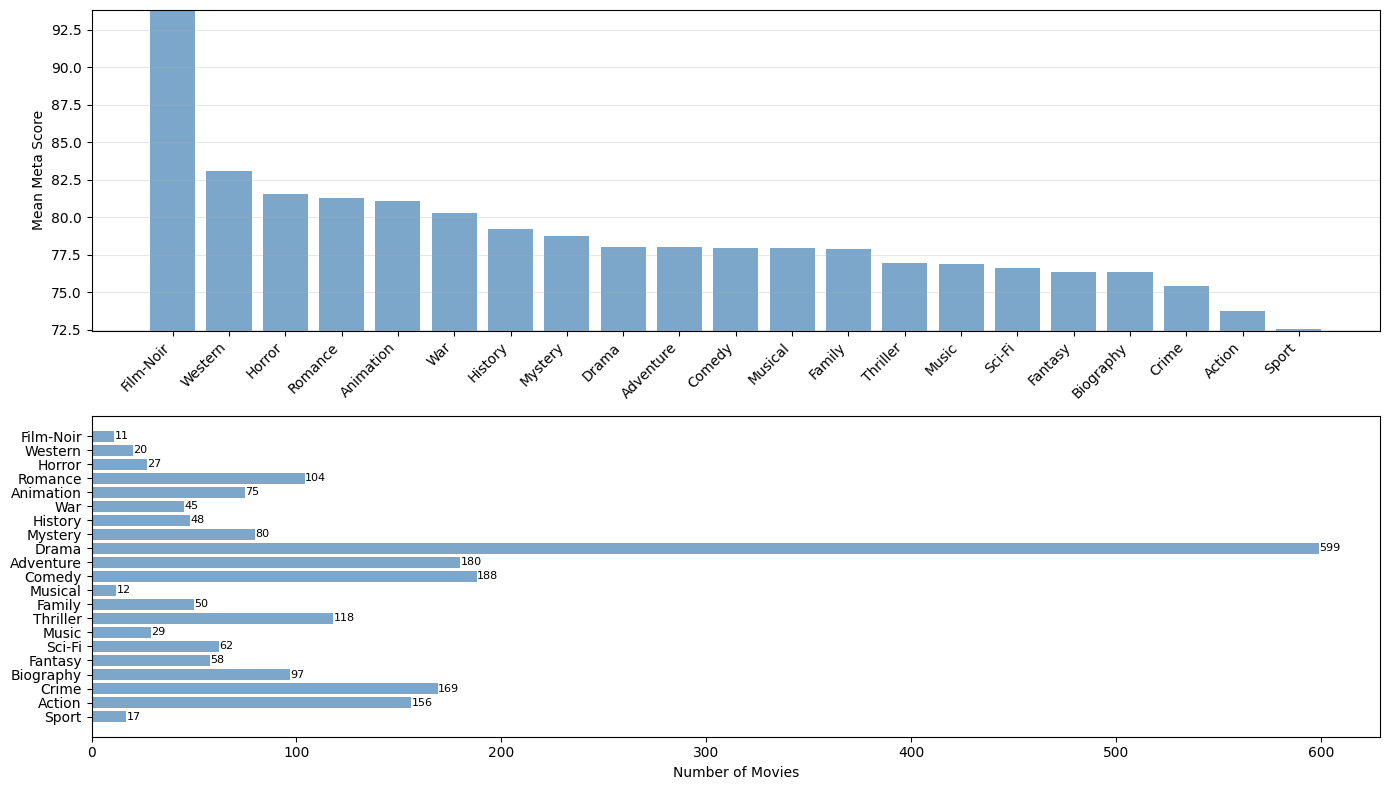

In [88]:
""" Gênero X Meta Score """

genre_ratings = {}

for index, row in dataset.iterrows():

  if pd.notna(row["Genre"]) and pd.notna(row["Meta_score"]):
    genres = [g.strip() for g in str(row["Genre"]).split(",")]

    for genre in genres:

      if genre not in genre_ratings:
        genre_ratings[genre] = []

      genre_ratings[genre].append(row["Meta_score"])

genre_statistics = {}

for genre, ratings in genre_ratings.items():

  genre_statistics[genre] = {"mean": np.mean(ratings),"count": len(ratings)}

sorted_genres = sorted(genre_statistics.items(), key=lambda x: x[1]["mean"], reverse=True)

genres_names = [item[0] for item in sorted_genres]
genres_ratings = [item[1]["mean"] for item in sorted_genres]
genres_count = [item[1]["count"] for item in sorted_genres]
genres_worst_mean = min([item[1]["mean"] for item in sorted_genres])
genres_better_mean = max([item[1]["mean"] for item in sorted_genres])

""" Gráfico de Barras - Gênero x Score Média """

plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.bar(range(len(genres_names)), genres_ratings, alpha=0.7, color="steelblue")
plt.xticks(range(len(genres_names)), genres_names, rotation=45, ha="right")
plt.ylabel("Mean Meta Score")
plt.ylim(genres_worst_mean - 0.1, genres_better_mean + 0.1)
plt.grid(axis="y", alpha=0.3)

""" Gráfico de Barras - Número de Filmes por Gênero """

plt.subplot(2, 1, 2)
plt.barh(range(len(genres_names)), genres_count, alpha=0.7, color="steelblue")
plt.yticks(range(len(genres_names)), genres_names)
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()

for i in range(len(genres_count)):
    plt.text(genres_count[i] + 0.1, i, str(genres_count[i]), ha="left", va="center", fontsize=8)

plt.tight_layout()
plt.show()

# Gráfico comparando os gênero de filme com a Meta Score média obtida

Conclusões:
+ "Film-Noir" é o gênero com maior nota média dos críticos, mas considerando apenas o cálculo de 11 filmes, enquanto "Sport" é o com menor nota média, para 17 filmes;
+ Diversos gêneros ficam mais ou menos nas mesmas faixas de média de Meta Score, mas com maior número de filmes;
+ Drama é o gênero com mais filmes, o que novamente pode ser uma indicação do motivo de sua média ser mais baixa em relação a outros

O que pode ser levado para um próximo filme:
+ "Film-Noir", como visto anteriormente, é um dos gêneros com menor faturamento, mas que também alcança boas notas no IMdb, mas tem baixo número de filmes;
+ Se empresa tiver a intenção de premiações e boa opinião dos críticos, buscar por gêneros com mais impacto na Meta Score é relevante.

# Outras conclusões com relação à análise:
+ Atores e Diretores com melhores notas/faturamentos são majoritariamente homens;
+ Gêneros com melhores notas podem servir a nichos mais especificos, o que pode ser uma explicação para suas baixas médias de faturamento, comparados à Gêneros com menores notas;
+ Olhando apenas do ponto de vista do faturamento, certas variáveis não tem tanto impacto ou o impacto não é muito visível, como duração e notas, enquanto gênero, atores e diretores têm relações mais visíveis e que podem indicar uma tendência;
+ Agradar ao público e agradar a crítica não é necessariamente linear, estratégias diferentes podem ser necessárias para garantir um equilibrio de ambos ou uma tendência para um dos lados;
+ Outras variáveis devem ser levadas em conta, como ter diretores e atores com melhores backgrounds para nota/faturamento pode ser mais caro, o que impacta no orçamento do filme.



# Hipóteses:
+ Filmes de "Adventure", "Sci-fi" e "Action" têm os melhores faturamentos entre todos os gêneros analisados, inclusive para as duas últimas décadas -> podem trazer um bom retorno financeiro para a empresa/ ter bom interesse do público;
+ Filmes de com os atores "Robert Downey Jr.", "Joe Russo" e "Zoe Saldana" tendem a ter bons faturamentos e de forma mais consistende, principalmente o primeiro ->  incluir no casting de atores do próximo filme é um bom indicativo de retorno financeiro/ interesse do público;
+ Filmes de "War", "Western" e "Film-Noir" têm as médias mais altas entre as notas do público, entretanto trazem faturamentos médios menores comparados com outros gêneros -> uma vez que a diferença entre a média de notas não é grande, escolher gêneros com notas mais medianas, mas com faturamentos maiores pode ser um bom equilibrio entre faturamento/ interesse e opinião do público;
+ Opinião da crítica pode variar muito e não corresponder necessariamente à opinião do público, como "Horror", que é o gênero com menor nota média do público, mas é o segundo com melhor nota da crítica -> agradar a crítica e agradar o público exige estratégias diferentes, principalmente se o objetivo for agradar a ambos, nesse caso "Western" pode ser uma escolha interessante, pois têm boas notas para ambos, mas também tem um faturamento médio razoável comparado com outros gêneros com boas notas.

# Passo 2 - Questões

a. Qual filme você recomendaria para uma pessoa que você não
conhece?

*Não conhecendo nada da pessoa ou do comportamento dela em relação a filmes, eu analisaria os filmes que obtiveram melhor performance na comparação entre faturamento, indicando uma maior bilheteria e consequentemente mais pessoas que estiveram interessadas em vê-lo, e nota no IMdb, que indica que as pessoas que assistiram gostaram do filme. Assim, teria mais chances da pessoa se interessar, mas também gostar do filme. Por essa métrica, o filme indicado seria "The Dark Knight". Escolhi considerar mais do que uma variável pois nota e faturamento podem tender para um público ou para outro, podendo resultar em um filme que, apesar de ter tido muita bilheteria e interesse, não foi bem recebido pelo público, ou filme com alta nota do público, mas nichado, que menos pessoas se interessaram em ver.*

b. Quais são os principais fatores que estão relacionados com alta
expectativa de faturamento de um filme?

*Pela análise feita na seção anterior, pode-se chegar a conclusão que escolher gêneros de alto faturamento, atores que tem boa consistência de faturamento em seus filmes e diretores que também o têm, são bons indicativos de que um filme possa ter um bom faturamento também, como os listados nos respectivos gráficos. Além desses dados, há outras variáveis que podem influeciar no faturamento, apesar de não estarem no dataset, como o marketing investido, o orçamento, época de lançamento, etc.*

c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

*Há certas palavras que despertam o interesse do público pelo filme. Analisando as overviews dos filmes, poderia se inferir quais palavras aparecem mais vezes em determinados gêneros. O que poderia ser feito para se inferir o gênero de um filme tendo apenas a Overview, seria treinar um modelo para identificar
palavras-chave ou tokens e qual a recorrência com que elas aparecem nos filmes com certos gêneros, podendo-se inferir qual gêneros têm mais chance de se encaixar, com certa precisão. Por exemplo, palavras como "crime" e "clandestine" poderia indicar que um dos gêneros do filme é "crime".*

In [89]:
""" Filme com melhor Faturamento X Nota IMdb """

ratings = []
gross_values = []
movie_names = []

for index, row in dataset.iterrows():

  if pd.notna(row["IMDB_Rating"]) and pd.notna(row["Gross"]) and str(row["Gross"]).strip() != '':
    rating = float(row["IMDB_Rating"])
    gross = float(str(row["Gross"]).replace(',', ''))
    ratings.append(rating)
    gross_values.append(gross)
    movie_names.append(row["Series_Title"])

ratings_norm = [(r - min(ratings)) / (max(ratings) - min(ratings)) for r in ratings]
gross_norm = [(g - min(gross_values)) / (max(gross_values) - min(gross_values)) for g in gross_values]
scores = [r * 0.5 + g * 0.5 for r, g in zip(ratings_norm, gross_norm)]
best_index = scores.index(max(scores))

print(f"Best Movie: {movie_names[best_index]}")

Best Movie: The Dark Knight


Colocando um peso de 50% para cada uma das variáveis, Faturamento e Nota IMdb, obteve-se o filme "The Dark Knight". Sabendo-se informações da pessoa, como se ela tende a se interessar por filmes com maiores notas ou se tende a se interessar por filmes mais populares, poderia-se modificar os pesos para que tendessem mais para um critério ou outro.

# Passo 3: Previsão da nota IMdb

**I. Explique como você faria a previsão da nota do imdb a partir dos dados.**

*É possível fazer uma previsão da nota com base nos dados que já temos no dataset, um modelo conseguiria identificar padrões de forma a prever um possível valor para a nota do imdb, com base nas outras informações que temos sobre aquele filme.*

**II. Quais variáveis e/ou suas transformações você utilizou e por quê?**

*Com base na minha experiência prévia em regressão, que consistiu em modelos que lidavam apenas com dados numéricos, eu escolhi as variáveis "Meta_score", "No_of_Votes", "Gross" e "Runtime", sendo que dessas, "Meta_score" foi a que demonstrou uma correlação um pouco maior com a nota do IMdb. As transformações que usei foram basicamente as mesmas que precisei fazer para gerar os gráficos, que foi transformar os valores de string para float e eliminando os valores vazios, que se encontravam por algumas das colunas. Transformando todos em numérico, o treinamento do modelo se torna bem mais simples e evita alguns erros ao encontrar valores no formato errado.*

**III. Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

*Como o objetivo da questão é prever a nota do IMdb, prever o valor dessa variável considerando o conjunto de informações, o problema em questão é uma regressão. Classificação trata de problemas em que é necessário incluir certa informação em uma classe, o que não cabe nesse problema. Eu utilizei um modelo de Random Forest, uma árvore de decisão, pois se trata de dados numéricos relativamente simples e que não tem relações muito claras entre si, é um modelo que consegue captar essas relações mais complexas e que não precisa de normalização. Os contras desse modelo são a baixa eficiência para grandes volumes de dados e o grande uso de memória, problemas que não são o caso desse dataset e do problema específico.*

**IV. Qual medida de performance do modelo foi escolhida e por quê?**

*Escolhi o MSE, pois é uma métrica comum para vários problemas de ML e que eu utilizei já em outros modelos, logo já estou familiarizada e entendo melhor como resolver problemas de performance com base nela. Como ela penaliza com maior intensidade erros maiores, o que é bem útil para evitar grandes desvios de precisão do modelo.*

In [90]:
""" Modelo de Regressão """

data = dataset.dropna(subset=["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Runtime"]).copy()
data.loc[:, "Runtime"] = data["Runtime"].str.extract(r'(\d+)').astype(float)
data.loc[:, "Gross"] = data["Gross"].astype(str).str.replace(',', '').astype(float)
data.loc[:, "Released_Year"] = data["Released_Year"].astype(float)
x_data = data[["Meta_score", "No_of_Votes", "Gross", "Runtime", "Released_Year"]]
y_data = data["IMDB_Rating"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

with open("imdb_regression_model.pkl", "wb") as f:
  pickle.dump(model, f)

new_movie = pd.DataFrame({"Meta_score": [80.0], "No_of_Votes": [2343110], "Gross": [28341469], "Runtime": [142], "Released_Year": [1994]})
prediction = model.predict(new_movie)

print(f"Prediction IMdb Rating: {prediction[0]:.2f}, Precision: {100 * (1 - abs(9.3 - prediction[0]) / 9.3):.2f}%")


Prediction IMdb Rating: 8.80, Precision: 94.67%


# Passo 4: Novo Filme e Cálculo da Nota IMdb


Comparando com o valor real de IMdb desse filme, que é 9.3, o modelo obteve aproximadamente 8.82, uma precisão de aproximadamente 94.84%.

Acredito que uma previsão poderia ser mais precisa ainda utilizando dados da Overview e relacionando com as variáveis diretor, gênero e atores, mas infelizmente não cheguei num resultado muito safistório nas minhas tentativas de empregar o maior número de variáveis possível, sem ter experiências prévias com variáveis não numéricas e, no caso de "Overview", com número variável de palavras. Utilizar as categorias "Genero", "Director" e "Star", que têm forte correlação com a nota do IMdb teria trazido resultados mais precisos.